In [1]:
import sys

import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd

import networkx as nx

import shapely as sh
from shapely import geometry

import utilities.common as uc

import utilities.get_random_city as grc

import utilities.get_graph as gg
import utilities.forge_graph as fg
import utilities.visualise_graph as vg

random.seed(0)

%load_ext autoreload
%autoreload 2

INFO: 2019-12-30 20:39:40,272: get_random_city.py: 101:
	217 segments
	33 one-way
	92 two-way


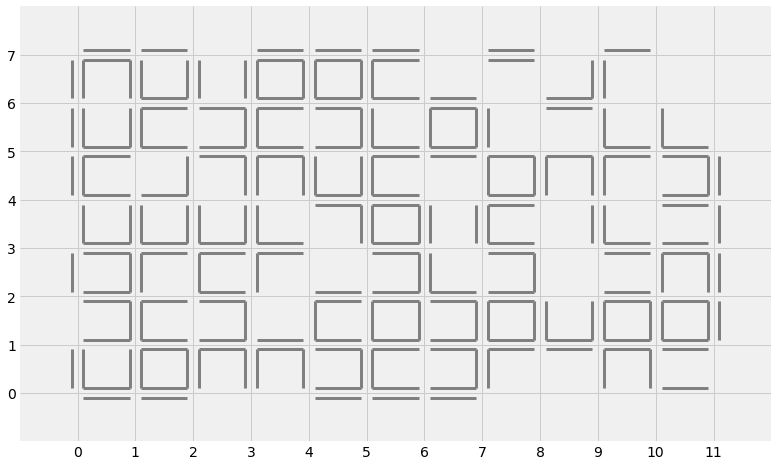

In [2]:
# Make random city. Create a list of dicts — one dict to describe one street segment.
# segment_id  unique id (int)
# direction (int)
#     0 — no_way
#     1 — one_way_direct
#     2 — one_way_reverse
#     3 — two_way
# coordinates start and end point of a segment (list of tuples)
# geometry    segment geometry (shapely linestring)
random_city = grc.get_random_city(
    city_size=(12, 8),
    frequencies=(0.3, 0.1, 0.1, 0.5)
#     city_size=[3, 1],
#     frequencies=[0., 0., 0., 1.]
    )
grc.plot_area(random_city)

INFO: 2019-12-30 20:39:41,012: visualise_graph.py: 118:
	nodes #: 83
	edges #: 205
	strongly connected: True
	disconnected nodes: 0	dead ends:9



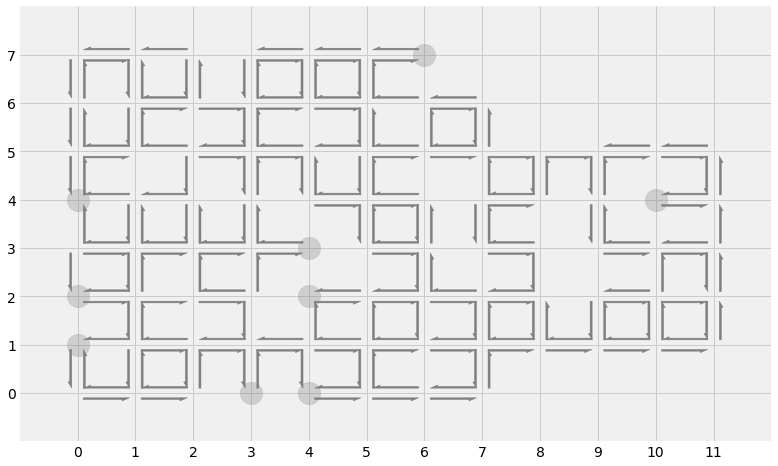

In [3]:
# Get a naive graph for a city.
# Naive graph is a directed graph,
# where nodes are cross-road coordinates (e.g. (0, 0)),
# i.e. one node can have up to 4 in-coming and 4 out-going edges.
naive_graph = gg.get_naive_graph(random_city)
vg.visualise_naive_graph(naive_graph)

INFO: 2019-12-30 20:39:41,643: visualise_graph.py: 228:
	nodes #: 410
	edges #: 743
	strongly connected: True
	disconnected nodes: 0
	straight drives: 319
	right turns: 121
	left turns: 125
	u-turns: 178
	dead ends: 9


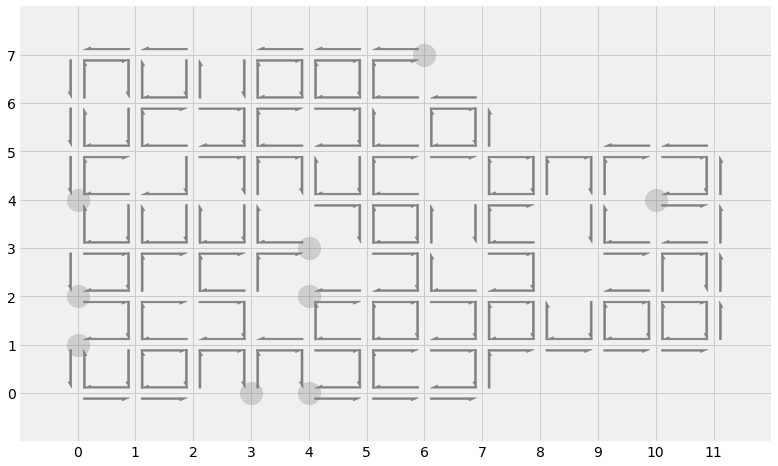

In [4]:
# Get a manoeuvre graph for a city.
# Manoeuvre graph is a directed graph,
# where nodes are the ends of a street segment,
# such that for a two-way street segment X
# the nodes for one way will be X_t, X_h and for the opposite way -X_t, and -X_h.
# There are two types of edges in manoeuvre graph: segment edges and monoeuvre edges.
# Segment edges simply describe a street segment; such edges attributes read 'go_straight';
# such edges are shown in visualisation.
# Manoeuvre edges describe a transition from one segment to another;
# such edge attribute can read anything from {turn_right, make_u_turn, turn_left, go_straight};
# such edges are NOT shown in visualisation.
manoeuvre_graph = gg.get_manoeuvre_graph(random_city)

vg.visualise_manoeuvre_graph(manoeuvre_graph)

INFO: 2019-12-30 20:39:42,267: forge_graph.py: 258:
	removed 10 nodes
INFO: 2019-12-30 20:39:42,308: visualise_graph.py: 228:
	nodes #: 390
	edges #: 713
	strongly connected: True
	disconnected nodes: 0
	straight drives: 299
	right turns: 121
	left turns: 125
	u-turns: 168
	dead ends: 9


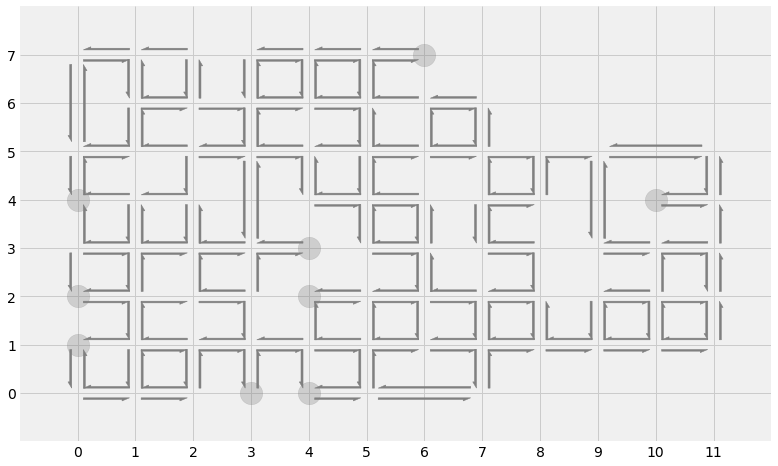

In [5]:
manoeuvre_graph = fg.join_split_edges(manoeuvre_graph)
vg.visualise_manoeuvre_graph(manoeuvre_graph)

INFO: 2019-12-30 20:39:42,903: get_graph.py: 261:
	district borders:
	west-east: 5 - 11
	south-north: 4 - 8
INFO: 2019-12-30 20:39:42,905: visualise_graph.py: 228:
	nodes #: 82
	edges #: 141
	strongly connected: False
	disconnected nodes: 30
	straight drives: 54
	right turns: 27
	left turns: 25
	u-turns: 35
	dead ends: 2


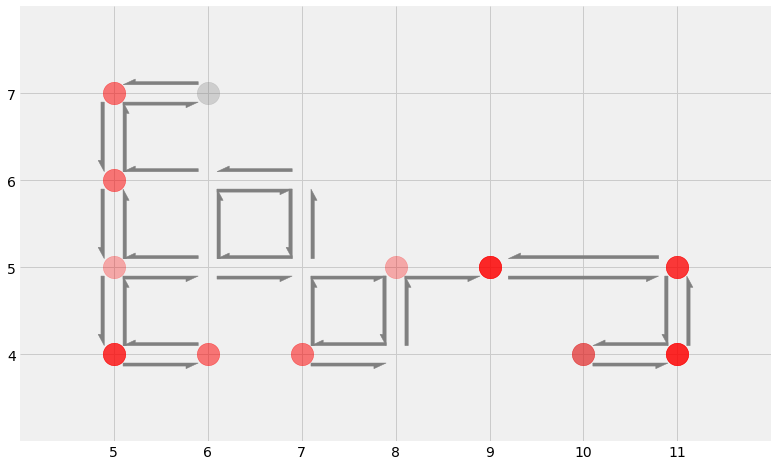

In [6]:
district_graph = gg.get_random_district_graph(manoeuvre_graph)
vg.visualise_manoeuvre_graph(district_graph)

INFO: 2019-12-30 20:39:43,299: visualise_graph.py: 228:
	nodes #: 106
	edges #: 166
	strongly connected: False
	disconnected nodes: 14
	straight drives: 73
	right turns: 31
	left turns: 27
	u-turns: 35
	dead ends: 2


52
12
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


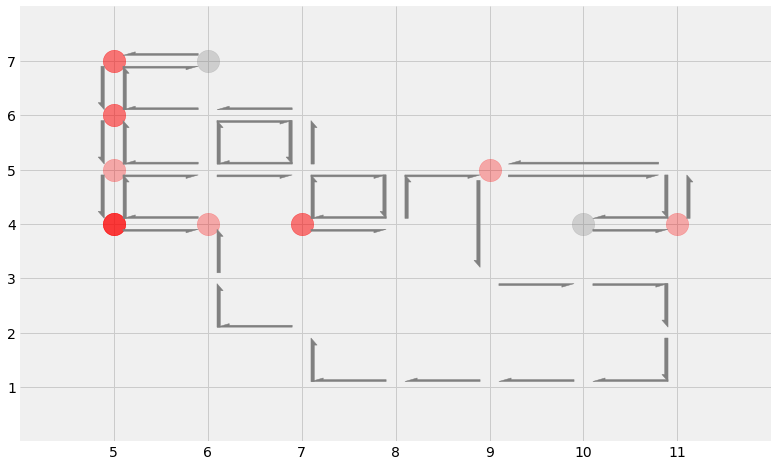

In [7]:
district_graph = fg.add_connecting_grafts(
    district_graph,
    manoeuvre_graph)
vg.visualise_manoeuvre_graph(district_graph)

INFO: 2019-12-30 20:43:22,045: visualise_graph.py: 228:
	nodes #: 92
	edges #: 130
	strongly connected: True
	disconnected nodes: 0
	straight drives: 63
	right turns: 21
	left turns: 18
	u-turns: 28
	dead ends: 3


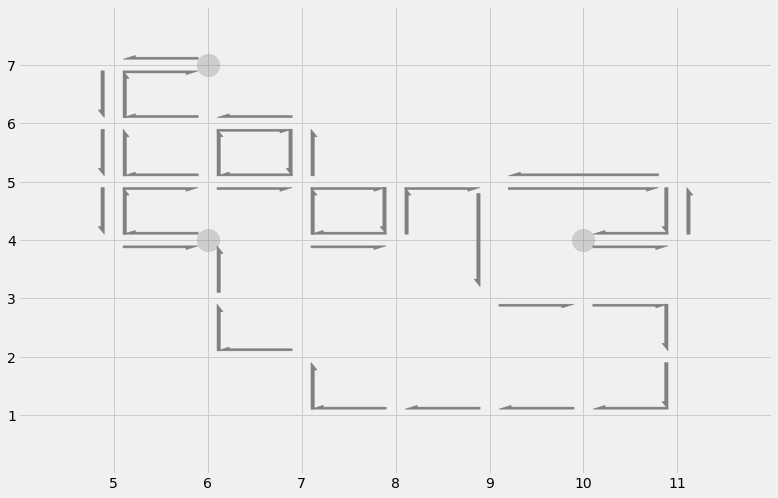

In [9]:
district_graph = fg.remove_single_nodes(
    district_graph)
vg.visualise_manoeuvre_graph(district_graph)

INFO: 2019-12-30 21:00:31,861: visualise_graph.py: 228:
	nodes #: 205
	edges #: 538
	strongly connected: True
	disconnected nodes: 0
	straight drives: 114
	right turns: 121
	left turns: 125
	u-turns: 178
	dead ends: 0
ERROR: 2019-12-30 21:00:31,873: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:31,877: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:31,881: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:31,887: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:31,891: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:31,895: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:31,898: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex lin

ERROR: 2019-12-30 21:00:32,266: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:32,271: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:32,278: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:32,288: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:32,290: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:32,297: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:32,302: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:32,307: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:32,313: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vert

ERROR: 2019-12-30 21:00:32,668: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:32,679: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:32,687: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:32,695: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:32,699: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:32,704: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:32,711: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:32,715: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vertex line
ERROR: 2019-12-30 21:00:32,723: geos.py: 219:
IllegalArgumentException: Cannot get offset of single-vert

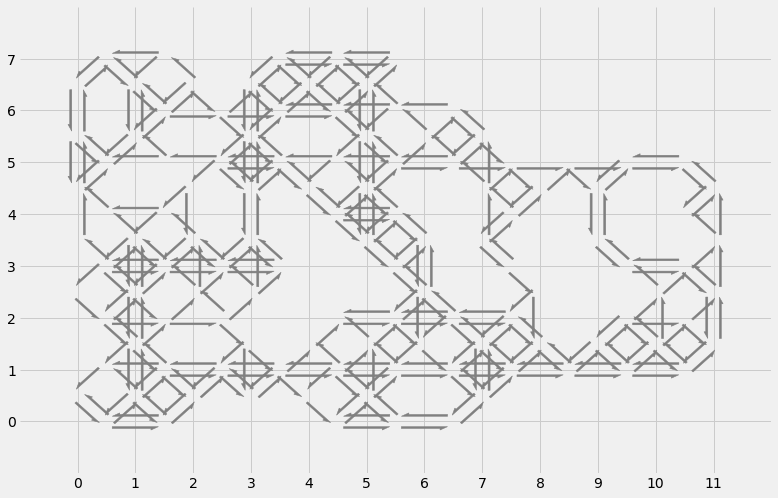

In [13]:
inverted_graph = gg.get_inverted_graph(random_city)
vg.visualise_manoeuvre_graph(inverted_graph)
# 	straight drives: 464
# 	right turns: 461
# 	left turns: 474
# 	u-turns: 682

INFO: 2019-12-30 21:05:21,074: visualise_graph.py: 228:
	nodes #: 205
	edges #: 538
	strongly connected: True
	disconnected nodes: 0
	straight drives: 114
	right turns: 121
	left turns: 125
	u-turns: 178
	dead ends: 0


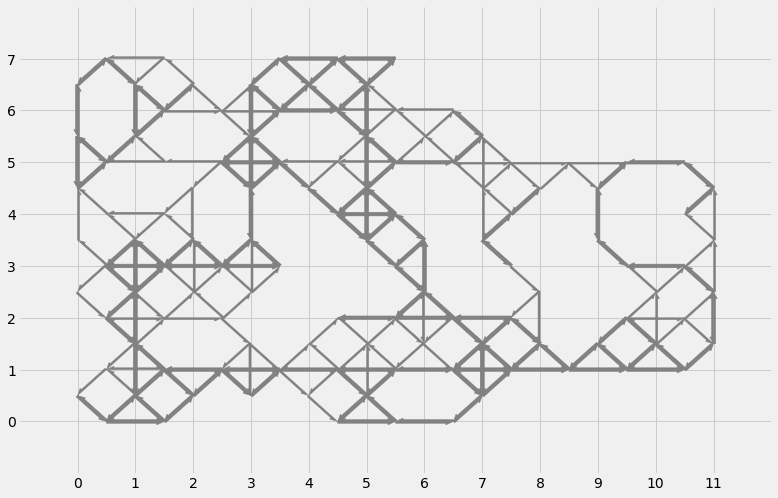

In [17]:
vg.visualise_inverted_graph(inverted_graph)

INFO: 2019-12-30 21:08:33,438: get_graph.py: 261:
	district borders:
	west-east: 0 - 6
	south-north: 3 - 7
INFO: 2019-12-30 21:08:33,441: visualise_graph.py: 228:
	nodes #: 84
	edges #: 219
	strongly connected: True
	disconnected nodes: 0
	straight drives: 45
	right turns: 47
	left turns: 53
	u-turns: 74
	dead ends: 0


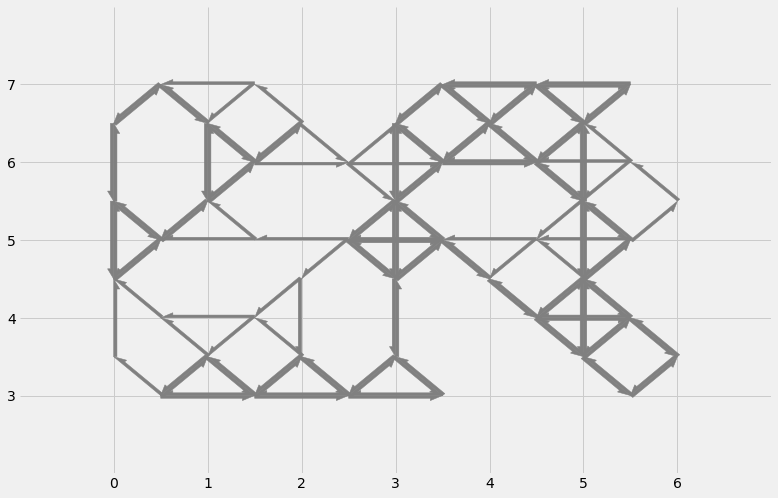

In [19]:
inverted_district_graph = gg.get_random_district_graph(inverted_graph)
vg.visualise_inverted_graph(inverted_district_graph)

INFO: 2019-12-30 21:09:18,572: visualise_graph.py: 228:
	nodes #: 91
	edges #: 227
	strongly connected: False
	disconnected nodes: 7
	straight drives: 50
	right turns: 49
	left turns: 54
	u-turns: 74
	dead ends: 0


84


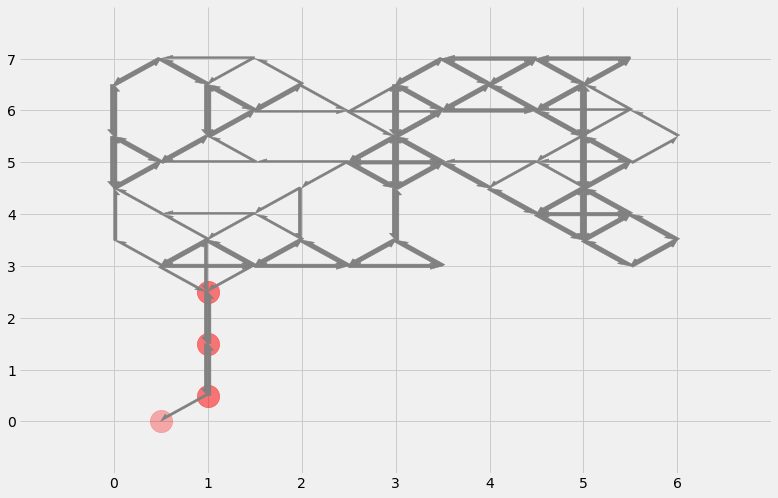

In [20]:
inverted_district_graph = fg.add_connecting_grafts(
    inverted_district_graph,
    inverted_graph)
vg.visualise_inverted_graph(inverted_district_graph)

In [ ]:
nx.is_strongly_connected(ig)

In [ ]:
def prune_u_turns(
        g: nx.DiGraph):
    edges = list(g.edges())
    for e in edges:
        manoeuvre = g.get_edge_data(*e)['manoeuvre']
        if manoeuvre == 'make_u_turn':
            test_g = g.copy()
            test_g.remove_edge(*e)
            if nx.is_strongly_connected(test_g):
                inverted_graph.remove_edge(*e)
                
def prune_left_turns(
        g: nx.DiGraph):
    edges = list(g.edges())
    for e in edges:
        manoeuvre = g.get_edge_data(*e)['manoeuvre']
        if manoeuvre == 'turn_left':
            test_g = g.copy()
            test_g.remove_edge(*e)
            if nx.is_strongly_connected(test_g):
                inverted_graph.remove_edge(*e)

In [ ]:
prune_u_turns(inverted_graph)
prune_left_turns(inverted_graph)

In [ ]:
vis_g.visualise_graph(inverted_graph)

In [ ]:
import geopandas as gpd

In [ ]:
np.arange(0.5, 17.6 + 1.0, 1)